# Algorytm realizujący HSP na 3 qbitach, 4-elementowa grupa

In [1]:
# from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from numpy import pi

In [2]:
from qiskit import Aer
from qiskit import assemble

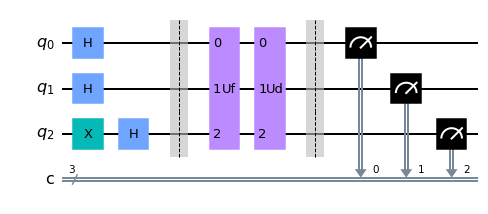

In [3]:
q = QuantumCircuit(3,3)

def Uf():
    U = QuantumCircuit(3)
    
    # Bramka Uf
    U.x(1)
    U.ccx(0,1,2)
    U.x(1)
    
    U = U.to_gate()
    U.name = 'Uf'
    
    return U

def Ud():
    U = QuantumCircuit(3)
    
    # Bramka Ud
    U.h(0)
    U.h(1)
    U.h(2)
    U.x(0)
    U.x(1)
    U.ccx(0,1,2)
    U.x(0)
    U.x(1)

    U.h(0)
    U.h(1)
    U.h(2)
    
    U = U.to_gate()
    U.name = 'Ud'
    
    return U


# Hadamardy
q.h(0)
q.h(1)
q.x(2)
q.h(2)

q.barrier()
q.append(Uf(), list([0,1,2]))
q.append(Ud(), list([0,1,2]))

q.barrier()

# q.measure_all()
q.measure(0,0)
q.measure(1,1)
q.measure(2,2)

q.draw(output='mpl')


{'011': 130, '001': 125, '101': 475, '000': 121, '010': 149}


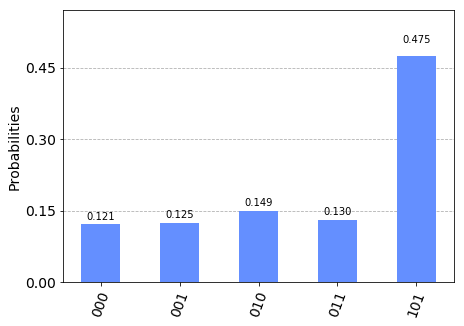

In [4]:
sym = Aer.get_backend('qasm_simulator')
tc_ = transpile(q, sym)
qobj = assemble(tc_, shots=1000)
wyniki = sym.run(qobj)

hist = wyniki.result().get_counts()
print(hist)

from qiskit.visualization import plot_histogram

plot_histogram(hist)